In [12]:
# Code Challenge: Implement PatternCount() (reproduced below).
#      Input: Strings Text and Pattern.
#      Output: Count(Text, Pattern).

import sys

# Please do not remove package declarations because these are used by the autograder.

# Insert your PatternCount function here, along with any subroutines you need
def pattern_count(text: str, pattern: str) -> int:
    count = 0
    for i in range(len(text)):
        if (text[i:len(pattern) + i]) == pattern:
            count+=1
    return count

In [13]:
# Code Challenge: Solve the Frequent Words Problem.

# Input: A string Text and an integer k.
# Output: All most frequent k-mers in Text.

import sys

# Please do not remove package declarations because these are used by the autograder.

# Insert your frequent_words function here, along with any subroutines you need
def frequent_words(text: str, k: int) -> list[str]:
    """Find the most frequent k-mers in a given text."""
    freqMap = {}
    n = len(text)
    for i in range(n):
        pattern = text[i:k+i]
        if pattern in freqMap.keys():
            freqMap[pattern] += 1
        else:
            freqMap[pattern] = 1
    max_val = max(freqMap.values())
    frequent_patterns = list(filter(lambda x: freqMap[x] == max_val, freqMap))
    return frequent_patterns

In [14]:
# Reverse Complement Problem: Find the reverse complement of a DNA string.

# Input: A DNA string Pattern.
# Output: Patternrc , the reverse complement of Pattern.

import sys

# Please do not remove package declarations because these are used by the autograder.

# Insert your reverse_complement function here, along with any subroutines you need
def reverse_complement(pattern: str) -> str:
    """Calculate the reverse complement of a DNA pattern."""
    rev_str = pattern[::-1]
    c_map = {"A": "T", "C": "G", "T": "A", "G": "C"}
    rev_comp = ""
    return rev_comp.join(c_map[base] for base in rev_str)

In [15]:
# Code Challenge: Solve the Pattern Matching Problem.

# Input: Two strings, Pattern and Genome.
# Output: A collection of integers specifying all starting positions where Pattern appears as a substring of Genome.

import sys

# Please do not remove package declarations because these are used by the autograder.

# Insert your pattern_matching function here, along with any subroutines you need
def pattern_matching(pattern: str, genome: str) -> list[int]:
    """Find all occurrences of a pattern in a genome."""
    p_locs = []
    for i in range(len(genome)):
        if (genome[i:len(pattern) + i]) == pattern:
            p_locs.append(i)
    return p_locs

In [16]:
# read the text file Vibrio_cholerae.txt
# find the number of times the pattern "CTTGATCAT" occurs in the text file
# return a space separated list of the starting positions of the pattern in the text file

import sys
import re # regular expressions

def get_positions():
    file_loc = "Vibrio_cholerae.txt"
    with open(file_loc, 'r') as f:
        text = f.read()
    pattern = "CTTGATCAT"
    positions = [str(m.start()) for m in re.finditer(pattern, text)] # regex here is more efficient than using a loop
    # explanation: re.finditer returns an iterator of match objects
    # m.start() returns the starting index of the match
    # we convert the starting index to a string and store it in a list
    # save the positions as a space separated text file
    with open('output.txt', 'w') as f:
        f.write(" ".join(positions))
    print(" ".join(positions))

get_positions()

# now same as above but not using regex

def solve2():
    file_loc = "Vibrio_cholerae.txt"
    with open(file_loc, 'r') as f:
        text = f.read()
    pattern = "CTTGATCAT"
    positions = []
    for i in range(len(text) - len(pattern) + 1):
        if text[i:i+len(pattern)] == pattern:
            positions.append(str(i))
    with open('output2.txt', 'w') as f:
        f.write(" ".join(positions))
    print(" ".join(positions))

60039 98409 129189 152283 152354 152411 163207 197028 200160 357976 376771 392723 532935 600085 622755 1065555


In [17]:
# FindClumps(Text, k, L, t)
#     Patterns ← an array of strings of length 0
#     n ← |Text|
#     for every integer i between 0 and n − L
#         Window ← Text(i, L)
#         freqMap ← FrequencyTable(Window, k)
#         for every key s in freqMap
#             if freqMap[s] ≥ t
#                 append s to Patterns
#     remove duplicates from Patterns
#     return Patterns

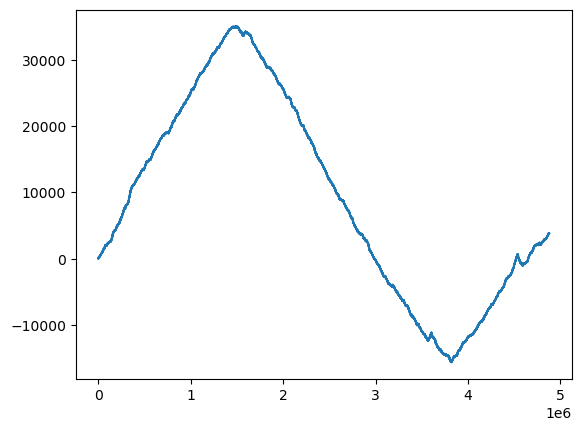

([3818757, 3818759], [1486348, 1486350, 1486353, 1486360, 1486361, 1486362, 1486363, 1486364, 1486365, 1486366, 1486369, 1486370, 1486372])


In [8]:
# code for skew plot

def skew_plot(genome: str) -> list[int]:
    """Calculate the skew of a genome."""
    skew = [0]
    for i in range(len(genome)):
        if genome[i] == "C":
            skew.append(skew[i] - 1)
        elif genome[i] == "G":
            skew.append(skew[i] + 1)
        else:
            skew.append(skew[i])
    return skew

# plot the skew of the genome
import matplotlib.pyplot as plt


file_loc = "Salmonella_enterica.txt"
with open(file_loc, 'r') as f:
    genome = f.read()

def plot_skew():
    # read genome file
    skew = skew_plot(genome)
    plt.plot(skew)
    plt.show()


# get the positions of the minimum skew and maximum skew
def min_max_skew(genome: str) -> list[int]:
    """Find the positions of the minimum and maximum skew."""
    skew = skew_plot(genome)
    min_skew = min(skew)
    max_skew = max(skew)
    min_positions = [i for i, x in enumerate(skew) if x == min_skew]
    max_positions = [i for i, x in enumerate(skew) if x == max_skew]
    return min_positions, max_positions

plot_skew()

# now we will find the positions of the minimum and maximum skew in the genome
print(min_max_skew(genome))

In [10]:
# get the skew array of the genome
skew = skew_plot(genome)
# get the index of the minimum skew value
min_index = skew.index(min(skew))
# get the index of the maximum skew value
max_index = skew.index(max(skew))
# print the indices of the minimum and maximum skew values
print(min_index, max_index)

3818757 1486348


In [18]:
# run frequent_words on the genome between the minimum and maximum skew values
# this will give us the most frequent 9-mers in the genome
frequent_words(genome[min_index:max_index], 9)

ValueError: max() arg is an empty sequence